In [1]:
import pandas as pd
pd.options.display.max_columns=100
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import numpy as np

import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv("Tbilisi Apartment Prices (Detailed).csv")

In [3]:
df

,CityPart,MaxFloor,Area,Rooms,Bedrooms,LastFloor,Floor,PRICE (GEL),Status,Electrical Points,Condition,Heating,Natural Gas,Bed,Stove (Gas/Electric),Table,Refrigerator,Chairs,Oven,Air Conditioner,Washing Machine,Sofa,Dishwasher
0,Krtsanisshi,6.0,730.0,7.0,4.0,1.0,6.0,4619070.0,Newly Constructed,3.0,Newly Renovated,Central Heating,1.0,0,0,1,0,0,0,0,0,0,0
1,Didubeshi,30.0,44.0,2.0,1.0,0.0,15.0,149441.0,Under Construction,1.0,Black Frame,NaN,0.0,0,0,0,0,0,0,0,0,0,0
2,Didubeshi,30.0,95.0,3.0,2.0,0.0,24.0,234757.0,Under Construction,1.0,Black Frame,NaN,0.0,0,0,0,0,0,0,0,0,0,0
3,Didubeshi,30.0,95.0,3.0,2.0,0.0,28.0,234757.0,Under Construction,1.0,Black Frame,NaN,0.0,0,0,0,0,0,0,0,0,0,0
4,Didubeshi,30.0,128.0,4.0,3.0,0.0,18.0,347789.0,Under Construction,1.0,Green Frame,NaN,0.0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7253,Did Dighomshi,10.0,90.0,4.0,3.0,0.0,6.0,346252.0,Under Construction,2.0,Green Frame,NaN,0.0,0,0,0,0,0,0,0,0,0,0
7254,Saburtaloze,8.0,80.0,3.0,2.0,0.0,7.0,271570.0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0
7255,Chughuretshi,8.0,253.0,6.0,3.0,0.0,7.0,1072702.0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0
7256,Did Dighomshi,9.0,76.0,2.0,1.0,0.0,4.0,257992.0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0


In [4]:
df['PricePerSQM']=df['PRICE (GEL)']/df['Area']

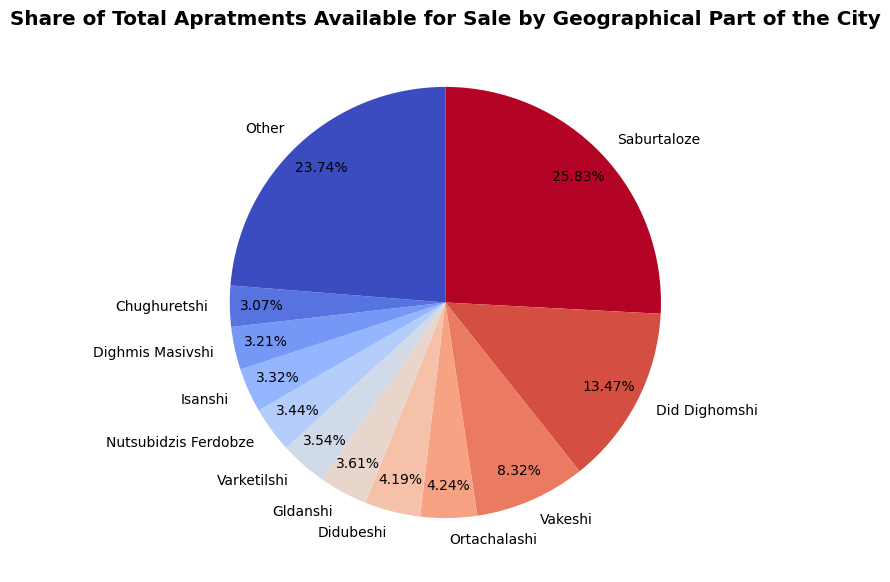

In [5]:
grouped=df['CityPart'].value_counts(normalize=True)
grouped.index=[i if v>=0.03 else 'Other' for i,v in zip(grouped.index,grouped.values)]
grouped=grouped.groupby(level=0).sum()
grouped = pd.concat([grouped[grouped.index != 'Other'].sort_values(ascending=False), grouped[grouped.index == 'Other']])

plt.figure(figsize=(7,7))
grouped.plot.pie(label='', autopct='%.2f%%', textprops={'fontsize': 10}, pctdistance=0.85, cmap='coolwarm_r', counterclock=False, startangle=90)
plt.title('Share of Total Apratments Available for Sale by Geographical Part of the City',fontweight='bold')
plt.show()

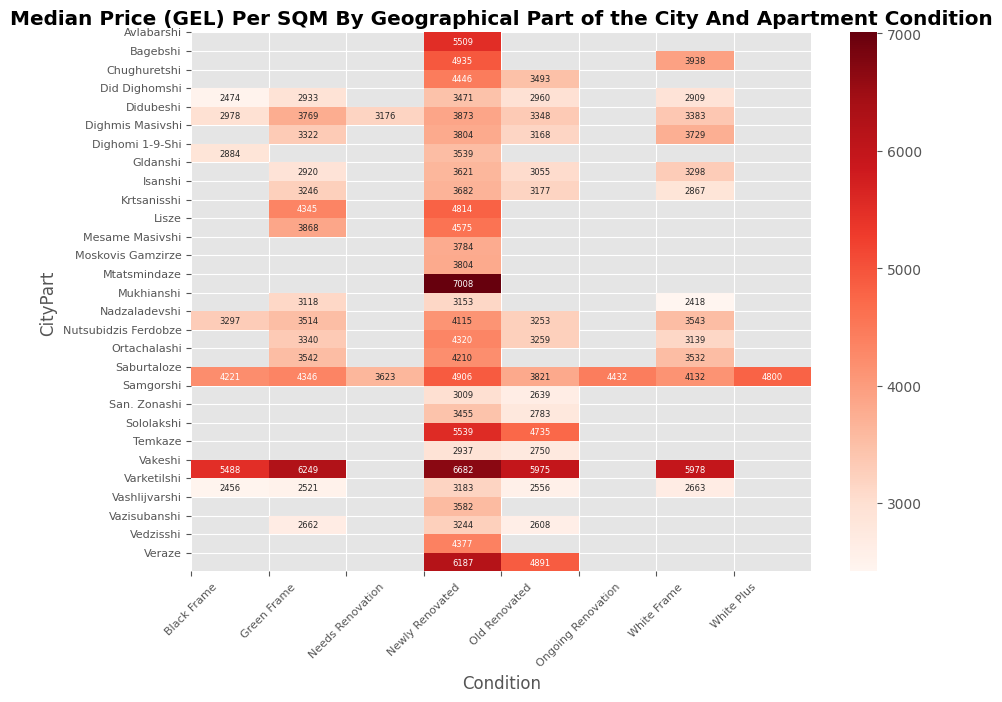

In [6]:

matrix=df.groupby(['CityPart','Condition']).filter(lambda x : x['CityPart'].count()>=10)\
.pivot_table(index='CityPart',columns='Condition',values='PricePerSQM',aggfunc='median').round()
matrix=matrix.fillna(0)
matrix=matrix.astype(int)
matrix=matrix.replace(0,np.nan)


plt.figure(figsize=(10,7))
sns.heatmap(matrix, annot=True, cmap='Reds', annot_kws={'size': 6}, fmt='g')
plt.title('Median Price (GEL) Per SQM By Geographical Part of the City And Apartment Condition',fontweight='bold')
plt.xticks(ticks=range(len(matrix.columns)), labels=matrix.columns, size=8,rotation=45)
plt.yticks(ticks=range(len(matrix.index)), labels=matrix.index, size=8)
plt.show()

In [7]:
mean=df['PricePerSQM'].mean()
std=df['PricePerSQM'].std()

df=df.query("@mean-2*@std<PricePerSQM<@mean+2*@std")

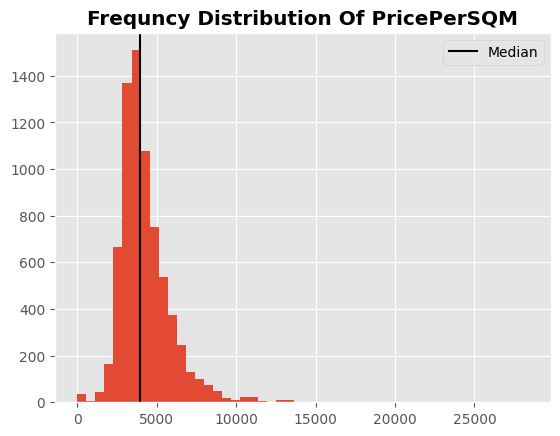

In [8]:
df['PricePerSQM'].hist(bins=50)
plt.axvline(df['PricePerSQM'].median(),color='Black',label='Median')
plt.title('Frequncy Distribution Of PricePerSQM',fontweight='bold')
plt.legend()
plt.show()